In [277]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [279]:
client = pd.read_csv(r"C:\Users\user\Downloads\Churn_Project\client_data.csv") 
client.head()



,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [281]:
price = pd.read_csv(r"C:\Users\user\Downloads\Churn_Project\price_data.csv")
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [282]:
combined = pd.concat([price, client], axis = 1)
combined



,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,id,channel_sales,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,...,t,0.00,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,d29c2c54acc38ff3c0614d0a653813dd,MISSING,...,f,0.00,16.38,16.38,1.0,18.89,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,...,f,0.00,28.60,28.60,1.0,6.60,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,...,f,0.00,30.22,30.22,1.0,25.46,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,149d57cf92fc41cf94415803a877cb4b,MISSING,...,f,52.32,44.91,44.91,1.0,47.98,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
combined.isnull()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,id,channel_sales,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
192998,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
192999,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
193000,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [286]:
combined_clean = combined.dropna()
combined_clean

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,id,channel_sales,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,...,t,0.00,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,d29c2c54acc38ff3c0614d0a653813dd,MISSING,...,f,0.00,16.38,16.38,1.0,18.89,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,...,f,0.00,28.60,28.60,1.0,6.60,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,...,f,0.00,30.22,30.22,1.0,25.46,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,149d57cf92fc41cf94415803a877cb4b,MISSING,...,f,52.32,44.91,44.91,1.0,47.98,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,8bb4f0b5b53d1d2aa3cfd6ff75491930,2015-06-01,0.129808,0.107582,0.075514,40.728885,24.43733,16.291555,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,...,t,0.00,27.88,27.88,2.0,381.77,4.0,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.0
14602,8bb4f0b5b53d1d2aa3cfd6ff75491930,2015-07-01,0.129808,0.107582,0.075514,40.728885,24.43733,16.291555,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,...,f,15.94,0.00,0.00,1.0,90.34,3.0,lxidpiddsbxsbosboudacockeimpuepw,6.000,1.0
14603,8bb4f0b5b53d1d2aa3cfd6ff75491930,2015-08-01,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,...,f,18.05,39.84,39.84,1.0,20.38,4.0,lxidpiddsbxsbosboudacockeimpuepw,15.935,1.0
14604,8bb4f0b5b53d1d2aa3cfd6ff75491930,2015-09-01,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,...,f,0.00,13.08,13.08,1.0,0.96,3.0,lxidpiddsbxsbosboudacockeimpuepw,11.000,0.0


In [289]:
new_data = combined_clean.copy()
new_data = new_data.drop(['id','channel_sales','origin_up','price_date','date_activ','date_end','date_renewal','date_modif_prod'], axis =1)
new_data['has_gas'] = new_data['has_gas'].map({'t' : 1, 'f': 0})
new_data


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,...,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0.0,54946.0,0.0,0.00,...,40.606701,1,0.00,25.44,25.44,2.0,678.99,3.0,43.648,1.0
1,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,4660.0,0.0,0.0,189.95,...,44.311378,0,0.00,16.38,16.38,1.0,18.89,6.0,13.800,0.0
2,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,544.0,0.0,0.0,47.96,...,44.311378,0,0.00,28.60,28.60,1.0,6.60,6.0,13.856,0.0
3,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,1584.0,0.0,0.0,240.04,...,44.311378,0,0.00,30.22,30.22,1.0,25.46,6.0,13.200,0.0
4,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,4425.0,0.0,526.0,445.75,...,40.606701,0,52.32,44.91,44.91,1.0,47.98,6.0,19.800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,0.129808,0.107582,0.075514,40.728885,24.43733,16.291555,32270.0,47940.0,0.0,4648.01,...,44.311378,1,0.00,27.88,27.88,2.0,381.77,4.0,15.000,0.0
14602,0.129808,0.107582,0.075514,40.728885,24.43733,16.291555,7223.0,0.0,181.0,631.69,...,58.995952,0,15.94,0.00,0.00,1.0,90.34,3.0,6.000,1.0
14603,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,1844.0,0.0,179.0,190.39,...,40.606701,0,18.05,39.84,39.84,1.0,20.38,4.0,15.935,1.0
14604,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,131.0,0.0,0.0,19.34,...,44.311378,0,0.00,13.08,13.08,1.0,0.96,3.0,11.000,0.0


In [291]:
y = new_data['churn']
X = new_data.drop(['churn'], axis = 1)
#train - test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y) 

                  


In [293]:
#scaling the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 



In [295]:
model = LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 1000, penalty = 'l1', solver = 'liblinear')
model.fit(X_train_scaled, y_train) 
y_pred = model.predict(X_test_scaled)


In [296]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.62      0.74      3297
         1.0       0.14      0.58      0.23       355

    accuracy                           0.62      3652
   macro avg       0.54      0.60      0.49      3652
weighted avg       0.86      0.62      0.69      3652



In [297]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns, 
    'coefficient': model.coef_[0] })
feature_importance['abs_coef'] = feature_importance['coefficient'].abs() 
feature_importance = feature_importance.sort_values( by='abs_coef', ascending=False ) 
feature_importance.head(15)

,feature,coefficient,abs_coef
21,net_margin,0.377634,0.377634
19,margin_net_pow_ele,0.365639,0.365639
15,forecast_price_pow_off_peak,0.278506,0.278506
7,cons_gas_12m,-0.263701,0.263701
22,num_years_antig,-0.252919,0.252919
4,price_peak_fix,-0.251563,0.251563
5,price_mid_peak_fix,0.236259,0.236259
13,forecast_price_energy_off_peak,-0.224955,0.224955
6,cons_12m,-0.209119,0.209119
23,pow_max,-0.171851,0.171851


In [298]:
feat_imp_data = combined_clean[
    ['net_margin', 'margin_net_pow_ele','forecast_price_energy_off_peak' ,
     'cons_gas_12m', 'num_years_antig','price_peak_fix', 'churn']
].copy()
feat_imp_data


,net_margin,margin_net_pow_ele,forecast_price_energy_off_peak,cons_gas_12m,num_years_antig,price_peak_fix,churn
0,678.99,25.44,0.114481,54946.0,3.0,0.00000,1.0
1,18.89,16.38,0.145711,0.0,6.0,0.00000,0.0
2,6.60,28.60,0.165794,0.0,6.0,0.00000,0.0
3,25.46,30.22,0.146694,0.0,6.0,0.00000,0.0
4,47.98,44.91,0.116900,0.0,6.0,0.00000,0.0
...,...,...,...,...,...,...,...
14601,381.77,27.88,0.138305,47940.0,4.0,24.43733,0.0
14602,90.34,0.00,0.100167,0.0,3.0,24.43733,1.0
14603,20.38,39.84,0.116900,0.0,4.0,24.43733,1.0
14604,0.96,13.08,0.145711,0.0,3.0,24.43733,0.0


In [299]:
#testing new model with significant features that affect churn 
y1 = feat_imp_data['churn']
X1 = feat_imp_data.drop(['churn'], axis = 1) 
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, random_state = 42, test_size = 0.25, stratify = y1)


In [300]:
model1 = LogisticRegression(class_weight = 'balanced' , random_state = 42, max_iter = 1000)
model1.fit(X1_train, y1_train) 
y_pred1 = model1.predict(X1_test)

In [331]:
print(classification_report(y1_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.60      0.73      3297
         1.0       0.15      0.63      0.24       355

    accuracy                           0.60      3652
   macro avg       0.54      0.62      0.48      3652
weighted avg       0.86      0.60      0.68      3652



In [347]:
#implementing random forest 
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(n_estimators=100,
    class_weight={0: 1, 1: 10},
    random_state=42, max_depth=10,
    min_samples_split=20)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=10,
                       min_samples_split=20, random_state=42)

In [348]:
y_pred = rf.predict(X_test)

In [349]:
rf.score(X_test, y_test)

0.7888828039430449

In [350]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      3297
         1.0       0.20      0.39      0.27       355

    accuracy                           0.79      3652
   macro avg       0.56      0.61      0.57      3652
weighted avg       0.86      0.79      0.82      3652



In [355]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
for threshold in [0.2, 0.3, 0.4,0.5]:
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print(classification_report(y_test, y_pred))


Threshold: 0.2
              precision    recall  f1-score   support

         0.0       0.99      0.05      0.10      3297
         1.0       0.10      1.00      0.18       355

    accuracy                           0.14      3652
   macro avg       0.55      0.53      0.14      3652
weighted avg       0.91      0.14      0.11      3652


Threshold: 0.3
              precision    recall  f1-score   support

         0.0       0.96      0.16      0.28      3297
         1.0       0.11      0.94      0.19       355

    accuracy                           0.24      3652
   macro avg       0.53      0.55      0.24      3652
weighted avg       0.88      0.24      0.27      3652


Threshold: 0.4
              precision    recall  f1-score   support

         0.0       0.94      0.61      0.74      3297
         1.0       0.15      0.63      0.24       355

    accuracy                           0.61      3652
   macro avg       0.54      0.62      0.49      3652
weighted avg       0.86   

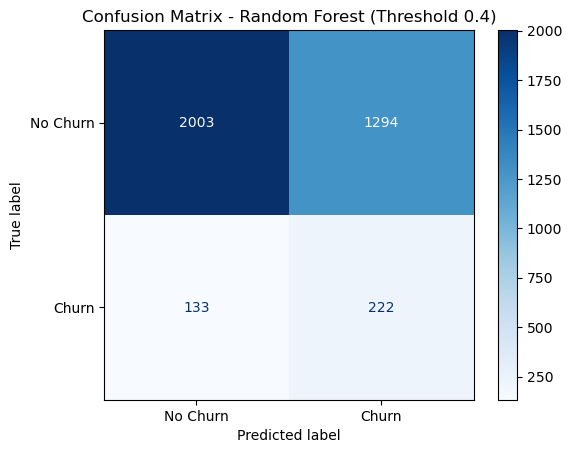

In [360]:
#visualization at 0.4 threshold 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.4).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Threshold 0.4)')
plt.show()


In [374]:
important_features = rf.feature_importances_ 
feature_names = X_train.columns 
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': important_features
}).sort_values('Importance', ascending=False).head(10) 

<function matplotlib.pyplot.show(close=None, block=None)>

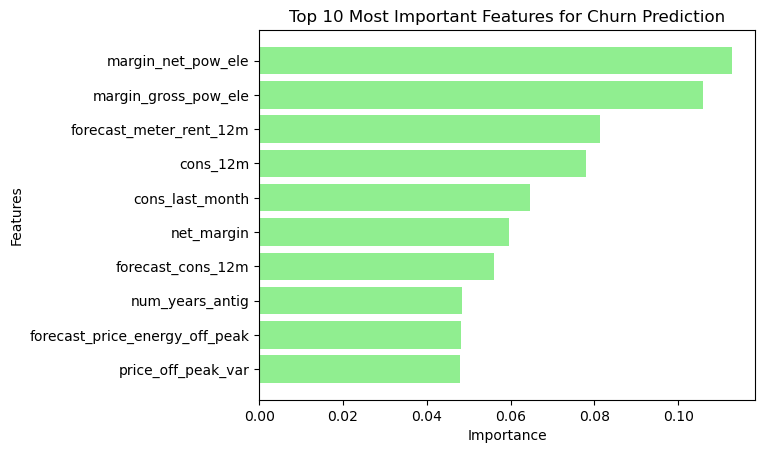

In [386]:
#bar chart for top 10 important features random forest model selected
plt.barh (feat_imp_df['Feature'], feat_imp_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features for Churn Prediction')
plt.gca().invert_yaxis()
plt.show

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

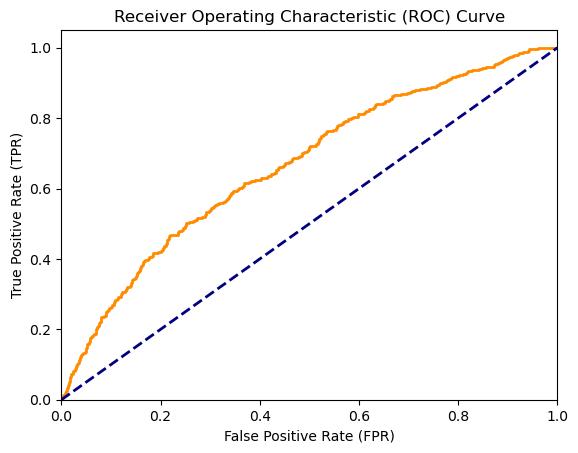

In [390]:
#ROC curve 
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')